<a href="https://colab.research.google.com/github/satyambhatt5/Satyam/blob/main/Random_Forest_on_%E2%80%9CCardiotography%E2%80%9D_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Domain: Medical  

Tasks to be performed: 

∙ Read the .csv file and understand the structure of the dataset.  

∙ Make a scatter-plot between ‘ASTV’ & ‘MSTV’ columns 

∙ Take the ‘ASTV’ column as the independent variable and ‘NSP’ column as the dependent  variable  

o Divide the data into ‘train’ and ‘test’ sets with test size to be 30% 
o Build the random forest classifier on the train set, where the numbers of  estimators are 300. 

Then predict the values on the test set  
o Build a confusion matrix and also find out the accuracy of the model built.  ∙ 

Take ‘LB’, ‘ASTV’, ‘MSTV’ and ‘Variance’ as the independent variables and ‘NSP’ as the  dependent variable  

o Divide the data into ‘train’ & ‘test’ sets with test size to be 30% 
o Build the random forest classifier on the train set, where the numbers of  estimators are 100. 

Then predict the values on the test set  
o Build a confusion matrix and also find out the accuracy of the model built 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
cy=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Hand on Intellipact /Case Study  /CTG.csv')

In [ ]:
cy.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,2.4,64,62,126,2,0,120,137,121,73,1,2
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,10.4,130,68,198,6,1,141,136,140,12,0,1
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,13.4,130,68,198,5,1,141,135,138,13,0,1
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,23.0,117,53,170,11,0,137,134,137,13,1,1
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,19.9,117,53,170,9,0,137,136,138,11,1,1


In [ ]:
#data analysis 
cy.info()
#data shape 
cy.shape 

#data decribe all   
#cy.describe().T
cy.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

LB            48
AC          1015
FM           696
UC          1315
DL           751
DS             8
DP           166
ASTV          75
MSTV          57
ALTV          87
MLTV         249
Width        154
Min          109
Max           86
Nmax          18
Nzeros         9
Mode          88
Mean         103
Median        95
Variance     133
Tendency       3
NSP            3
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


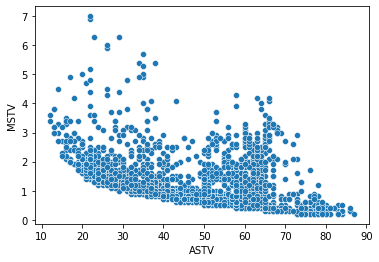

In [ ]:
sns.scatterplot(cy.ASTV,cy.MSTV)

In [ ]:
#buiding the random forest model   
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
X=cy[['ASTV']].values
y=cy[['NSP']].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0,train_size=.80)


In [ ]:
print(x_train.shape)

(1700, 1)


In [ ]:
rm=RandomForestClassifier(n_estimators=300)

In [ ]:
cl=rm.fit(x_train,y_train)
cl

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=rm.predict(x_test)

In [ ]:
#accuracy of the model  
metrics.accuracy_score(y_test,y_pred)

0.7769953051643192

In [ ]:
#confusion matrix of the model  
cm=metrics.confusion_matrix(y_test,y_pred)
cm

array([[302,  23,   1],
       [ 39,  19,   0],
       [ 20,  12,  10]])

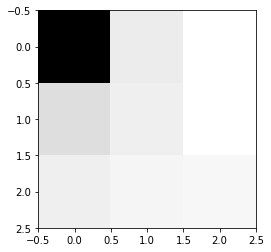

In [ ]:
plt.imshow(cm, cmap='binary')
